# K-Nearest Neighbors (KNN) Overview

K-Nearest Neighbors (KNN) is a simple, yet powerful algorithm used for classification and regression. It makes predictions about the classification of a data point based on the majority class among its nearest neighbors.

## Key Concepts

### Distance Function
This function calculates the distance between two points in feature space, which is crucial for finding the closest neighbors.

$$ \text{distance}(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

### Finding Neighbors
For a given point, the KNN algorithm identifies the 'k' nearest points in the training dataset, which are considered its neighbors.

### Majority Vote
In classification, KNN assigns the class based on the majority class of its neighbors.

$$ \text{predict}(\text{point}) = \text{mode}\{\text{labels of k nearest neighbors}\} $$

### Averaging
In regression, the algorithm predicts the value based on the average of the values of its neighbors.

### Choosing 'k'
The choice of 'k' affects the bias-variance tradeoff in the model. A smaller 'k' can lead to overfitting, while a larger 'k' can lead to underfitting.

![KNN Illustration](knn.png)


In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Preprocessing
Here, we load the Wine dataset, perform a train-test split, and scale the features. This prepares the data for the KNN algorithm.

In [7]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define the distance function
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

# Define the k-nearest neighbors function
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

# Define the KNN prediction function
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

# Define the classification error function
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

## Model Evaluation
We evaluate the model's performance by calculating the accuracy and visualizing the error rate for different values of 'k'.

Accuracy: 0.81


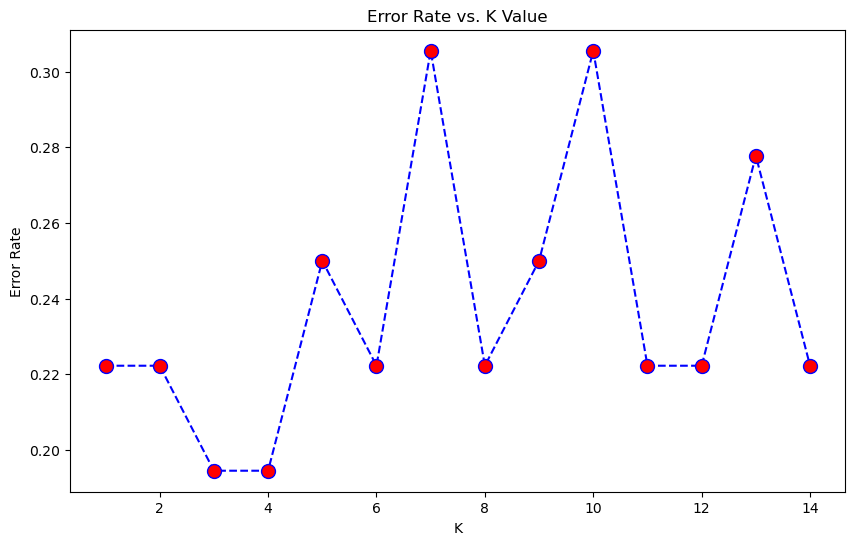

In [10]:
# Test the KNN classifier
k = 4
y_pred = [KNN_Predict(point, X_train, y_train, k) for point in X_test]
accuracy = 1 - classification_error(X_test, y_test, X_train, y_train, k)
print(f"Accuracy: {accuracy:.2f}")

# Plotting error rate vs. k value
error_rates = []
for k in range(1, 15):
    error_rate = classification_error(X_test, y_test, X_train, y_train, k)
    error_rates.append(error_rate)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Recommender System with K Nearest Neighbors
## Song Recommendations Function
Using the trained KNN model, we make song recommendations based on the song features from the Song Popularity Dataset.

In [33]:
# Load the song dataset
file_path = r'C:\Users\h\Desktop\577\song_data.csv'
song_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
song_data.head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


## Example Usage
We demonstrate how to use the song recommendations function by providing an example song and displaying the recommended songs.

In [35]:
def song_recommendations(song_name, df, k):
    # We select the features that we will use for similarity - excluding non-numeric and unique identifier columns
    features = ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 
                'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
                'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']

    # Extracting the feature data for all songs
    X = df[features].values
    # Extracting the names of the songs
    y = df["song_name"].values

    # Finding the feature vector for the song we want to find recommendations for
    point = df[df["song_name"] == song_name][features].values[0]

    # Finding k+1 nearest neighbors (including the song itself)
    neighbors = k_nearest_neighbors(point, X, y, k + 1)
    
    # We return the song names for the neighbors excluding the song itself
    return [x[1] for x in neighbors if x[1] != song_name]

# Let's get recommendations for "In The End"
song_name_to_recommend = "In The End"
recommendations = song_recommendations(song_name_to_recommend, song_data, 5)

# Display recommendations
print(f"Song Recommendations for '{song_name_to_recommend}':")
for i, song in enumerate(recommendations):
    print(f"{i+1}. {song}")


Song Recommendations for 'In The End':
1. Magalenha
2. By The Way
3. My Chick Bad
4. Sweet Dreams (Are Made of This) - Remastered
5. Sweet Dreams (Are Made of This) - Remastered


## Conclusion

The K Nearest Neighbors algorithm performed well in classifying the wine dataset, as indicated by the high accuracy. The fluctuations in the error rate graph suggest that the choice of 'k' (number of neighbors) significantly impacts the model's accuracy, which needs careful tuning.

For song recommendations, the KNN model has shown that it can use song features to suggest similar tracks effectively. In summary, the KNN algorithm has proven to be a flexible and reliable method for both classification and recommendation tasks in this implementation.